# Activity 18


---
## Setup
---

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def prxgraddescent_l1(X,y,tau,lam,w_init,it):

## compute it iterations of L2 proximal gradient descent starting at w1
## w_{k+1}= (w_k - tau*X'*(X*w_k - y)/(1+lam*tau)
## step size tau
    W = np.zeros((w_init.shape[0], it+1))
    Z = np.zeros((w_init.shape[0], it+1))
    W[:,[0]] = w_init
    for k in range(it):
        Z[:,[k+1]] = W[:,[k]] - tau * X.T @ (X @ W[:,[k]] - y);
        W[:,[k+1]] = np.sign(Z[:,[k+1]])* np.clip(np.abs(Z[:,[k+1]])-lam*tau/2,0,float("inf"))
        
    return W,Z

In [23]:
## Proximal gradient descent trajectories
## Least Squares Problem
X = np.array([[2, 1]])
y = np.array([[4]])

### Find values of f(w), the contour plot surface for 
w1 = np.arange(-1,3,.1)
w2 = np.arange(-1,3,.1)
fw = np.zeros((len(w1), len(w2)))
for i in range(len(w2)):
    for j in range(len(w1)):
        w = np.array([ [w1[j]], [w2[i]] ])
        fw[i,j] = (X @ w - y)**2


C:\Users\ftstc\AppData\Local\Temp\ipykernel_11780\3461163016.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fw[i,j] = (X @ w - y)**2


---
## Question 3a) How many iterations does it take for the algorithm to converge to the solution? 
What is the converged value for w?
--
The iterations are 4 to converge. w is [1.5, 0. ].

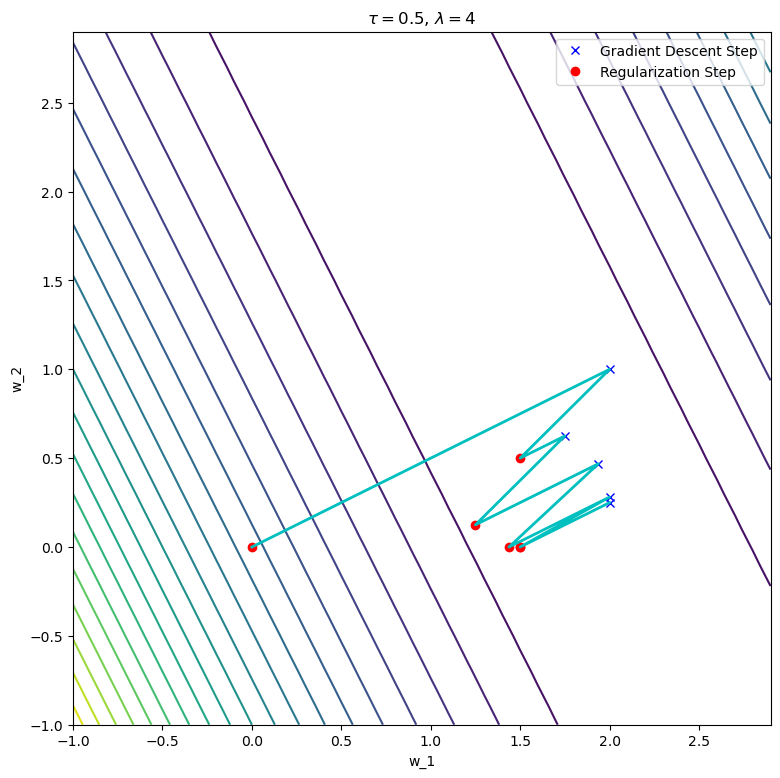

In [24]:
## Find and display weights generated by gradient descent

w_init = np.array([[0],[0]])
lam = 4;
it = 5
tau = 0.25
W,Z = prxgraddescent_l1(X,y,tau,lam,w_init,it)
# Concatenate gradient and regularization steps to display trajectory
G = np.zeros((2,0))
for i in range(it):
    G = np.hstack((G,np.hstack((W[:,[i]],Z[:,[i+1]]))))

plt.figure(figsize=(9,9))
plt.contour(w1,w2,fw,20)
plt.plot(Z[0,1::],Z[1,1:],'bx',linewidth=2, label="Gradient Descent Step")
plt.plot(W[0,:],W[1,:],'ro',linewidth=2, label="Regularization Step")
plt.plot(G[0,:],G[1,:],'-c',linewidth=2)
plt.legend()
plt.xlabel('w_1')
plt.ylabel('w_2')
plt.title('$\\tau = $'+str(.5)+', $\lambda = $'+str(lam));

In [25]:
print(W)
W[:,-1]

[[0.     1.5    1.25   1.4375 1.5    1.5   ]
 [0.     0.5    0.125  0.     0.     0.    ]]


array([1.5, 0. ])

---
## Question 3b) Change to λ = 2. How many iterations does it take for the algorithm to converge 
to the solution? What is the converged value for w?
--
The iterations are 8 to converge. w is [1.75, 0.  ].

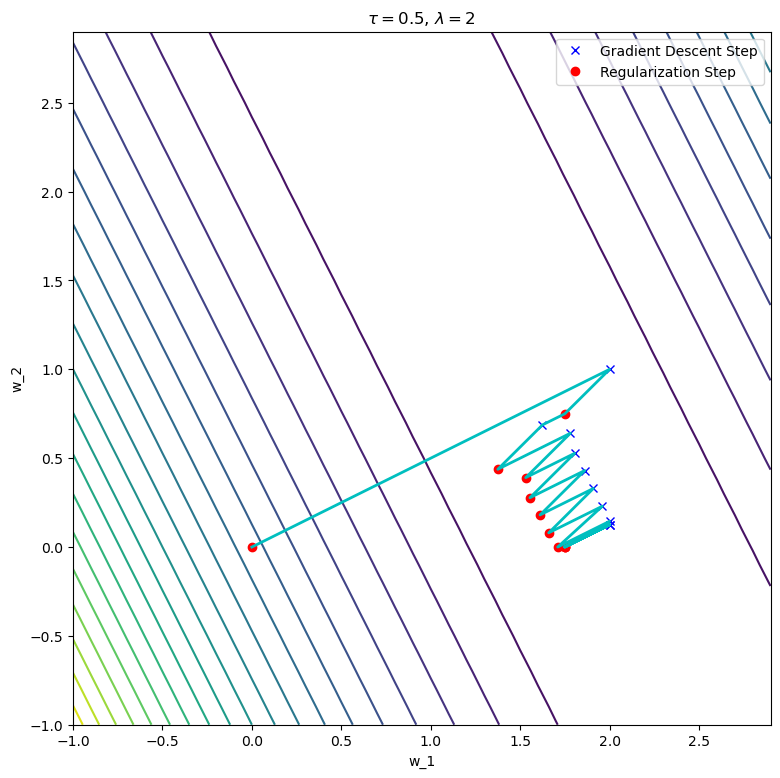

In [26]:
## Find and display weights generated by gradient descent

w_init = np.array([[0],[0]])
lam = 2;
it = 10
tau = 0.25
W,Z = prxgraddescent_l1(X,y,tau,lam,w_init,it)
# Concatenate gradient and regularization steps to display trajectory
G = np.zeros((2,0))
for i in range(it):
    G = np.hstack((G,np.hstack((W[:,[i]],Z[:,[i+1]]))))

plt.figure(figsize=(9,9))
plt.contour(w1,w2,fw,20)
plt.plot(Z[0,1::],Z[1,1:],'bx',linewidth=2, label="Gradient Descent Step")
plt.plot(W[0,:],W[1,:],'ro',linewidth=2, label="Regularization Step")
plt.plot(G[0,:],G[1,:],'-c',linewidth=2)
plt.legend()
plt.xlabel('w_1')
plt.ylabel('w_2')
plt.title('$\\tau = $'+str(.5)+', $\lambda = $'+str(lam));

In [27]:
print(W)
W[:,-1]

[[0.         1.75       1.375      1.53125    1.5546875  1.61132812
  1.65966797 1.71008301 1.75       1.75       1.75      ]
 [0.         0.75       0.4375     0.390625   0.27734375 0.18066406
  0.07983398 0.         0.         0.         0.        ]]


array([1.75, 0.  ])

---
## Question 3c) Explain what happens to the weights in the regularization step.
---
When the lamda becomes smaller, the weights become bigger.

---
## Question 4a) What is the maximum value for the step size in the negative gradient direction, τ?
---

τ is 1/5.

In [31]:
U, s, VT = np.linalg.svd(X, full_matrices=True)
print(s)
s2 = s**(2)
print(s2)

[2.23606798]
[5.]


In [ ]:
9